# Access to a SQL database - Example SQLLite

Import der create_engine Funktion aus der sqlalchemy Bibliothek und Pandas als pd.
Dann eine Variable (hier engine) mit der create_engine Funktion und dem Übergabestring anlegen. Der Übergabestring enhält den Datenbanktyp und den Pfad zur Datenbank:

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

pfad = r"C:\Users\R17494\Datasets\chinook\chinook.db"
engine = create_engine('sqlite:///' + pfad)

Mit der Methode table_names() kann auf die Namen der Datenbank-Tabellen zugegriffen werden:

In [2]:
table_names = engine.table_names()
print(table_names)

['albums', 'artists', 'customers', 'employees', 'genres', 'invoice_items', 'invoices', 'media_types', 'playlist_track', 'playlists', 'sqlite_sequence', 'sqlite_stat1', 'tracks']


### 1. Zugriff auf die Datenbank-Tabellen über die engine Methoden

In [3]:
with engine.connect() as con:
    rs = con.execute("SELECT * FROM artists")
    df_all = pd.DataFrame(rs.fetchall())
    df_all.columns = rs.keys()
    
    rs = con.execute("SELECT * FROM tracks")
    df_many = pd.DataFrame(rs.fetchmany(size=5))
    df_many.columns = rs.keys()

In [4]:
print(df_all.head())

   ArtistId               Name
0         1              AC/DC
1         2             Accept
2         3          Aerosmith
3         4  Alanis Morissette
4         5    Alice In Chains


In [5]:
print(df_many)

   TrackId                                     Name  AlbumId  MediaTypeId  \
0        1  For Those About To Rock (We Salute You)        1            1   
1        2                        Balls to the Wall        2            2   
2        3                          Fast As a Shark        3            2   
3        4                        Restless and Wild        3            2   
4        5                     Princess of the Dawn        3            2   

   GenreId                                           Composer  Milliseconds  \
0        1          Angus Young, Malcolm Young, Brian Johnson        343719   
1        1                                               None        342562   
2        1  F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...        230619   
3        1  F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...        252051   
4        1                         Deaffy & R.A. Smith-Diesel        375418   

      Bytes  UnitPrice  
0  11170334       0.99  
1   5510424 

### 2. Zugriff auf die Datenbank-Tabellen über pandas

In [11]:
query = """
SELECT Name, COUNT(Title) as num_albums 
FROM artists 
INNER JOIN albums ON artists.ArtistID = albums.ArtistID 
GROUP BY Name 
ORDER BY num_albums  DESC 
"""
df = pd.read_sql_query(query, engine)

In [12]:
print(df.head(20))

                       Name  num_albums
0               Iron Maiden          21
1              Led Zeppelin          14
2               Deep Purple          11
3                        U2          10
4                 Metallica          10
5             Ozzy Osbourne           6
6                 Pearl Jam           5
7           Various Artists           4
8                 Van Halen           4
9                      Lost           4
10             Foo Fighters           4
11            Faith No More           4
12       The Rolling Stones           3
13               The Office           3
14                  Santana           3
15    Red Hot Chili Peppers           3
16                   R.E.M.           3
17                    Queen           3
18  Os Paralamas Do Sucesso           3
19              Miles Davis           3


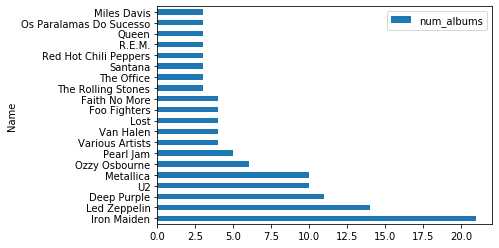

In [18]:
df.head(20).plot(kind='barh', x='Name', y='num_albums')
plt.show()

In [26]:
query = """
SELECT * 
FROM tracks 
"""
tracks = pd.read_sql_query(query, engine)
tracks.head()

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [36]:
print(tracks['UnitPrice'].max())
print(tracks['UnitPrice'].min())
print(tracks['UnitPrice'].mean())
print(tracks['UnitPrice'].value_counts())

1.99
0.99
1.0508050242648312
0.99    3290
1.99     213
Name: UnitPrice, dtype: int64


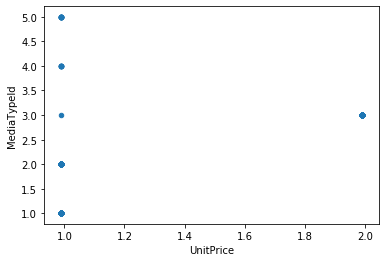

In [47]:
tracks.plot(kind='scatter', x='UnitPrice', y='MediaTypeId')
plt.show()

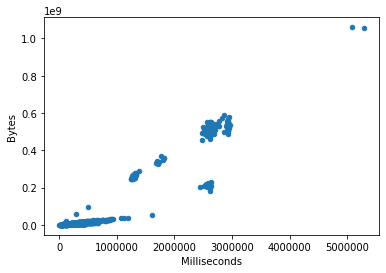

In [29]:
tracks.plot(kind='scatter', x='Milliseconds', y='Bytes')
plt.show()

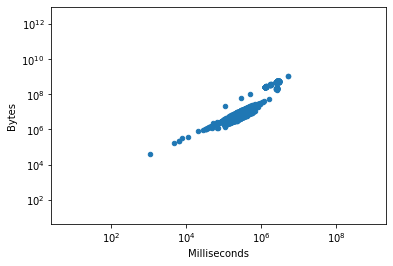

In [30]:
tracks.plot(kind='scatter', x='Milliseconds', y='Bytes', logx=True, logy=True)
plt.show()